In [1]:
%pip install pandas numpy matplotlib seaborn prophet


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Plot setup
sns.set(style="whitegrid")
%matplotlib inline


In [5]:
#  Load cleaned dataset
data_path = r"C:\Users\choma\OneDrive\Documents\Profile Projects\retail-sales-analysis\data\processed\cleaned_retail_sales.csv"
df = pd.read_csv(data_path)

#  Preview data
print("Shape:", df.shape)
df.head()


Shape: (1000, 9)


,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
# Column names and types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
#  Descriptive statistics for numerical columns
df.describe()


,transaction_id,age,quantity,price_per_unit,total_amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
# Summary of categorical columns
categorical_cols = ['gender', 'product_category']
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())



gender value counts:
gender
Female    510
Male      490
Name: count, dtype: int64

product_category value counts:
product_category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [9]:
#  Missing values
df.isnull().sum()


transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64

In [10]:
#  Duplicate rows
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [11]:
#  Unique counts
df.nunique()


transaction_id      1000
date                 345
customer_id         1000
gender                 2
age                   47
product_category       3
quantity               4
price_per_unit         5
total_amount          18
dtype: int64

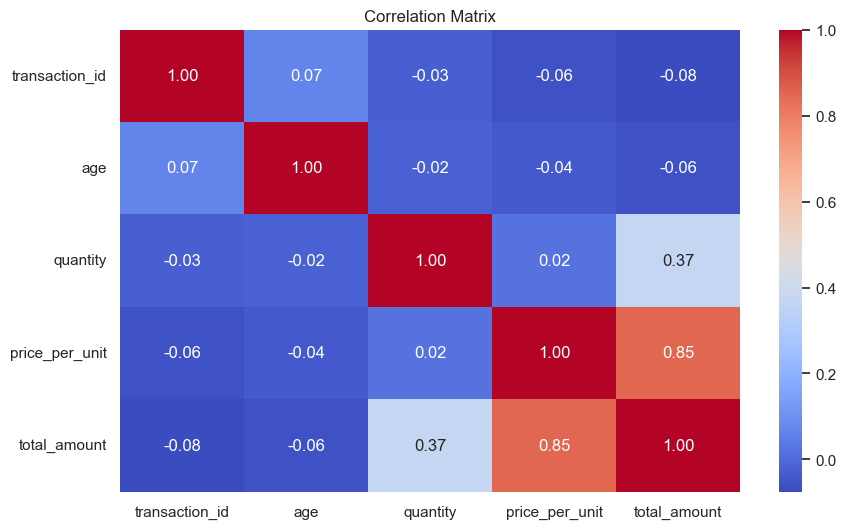

In [ ]:
import os

#  Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

# Save figure
fig_dir = "figures"
os.makedirs(fig_dir, exist_ok=True)
plt.savefig(os.path.join(fig_dir, "01_correlation_matrix.png"))
plt.show()


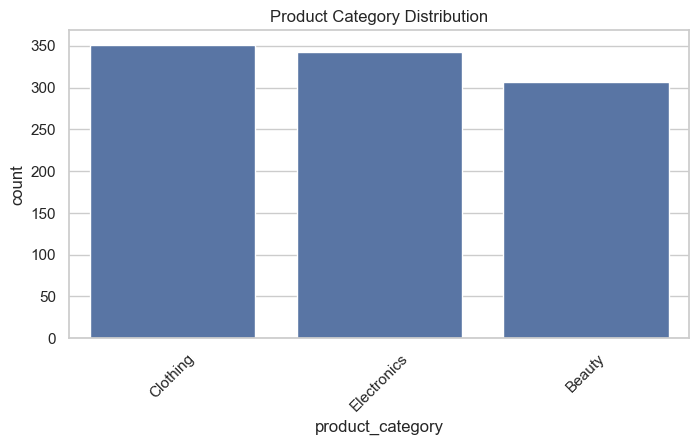

In [16]:
#  Product Category Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='product_category', order=df['product_category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Product Category Distribution')

#Save figure 
plt.savefig(os.path.join(fig_dir, "01_Product_Category_Distribution.png"))
plt.show()



C:\Users\choma\AppData\Local\Temp\ipykernel_24296\3978299381.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="Blues_d")


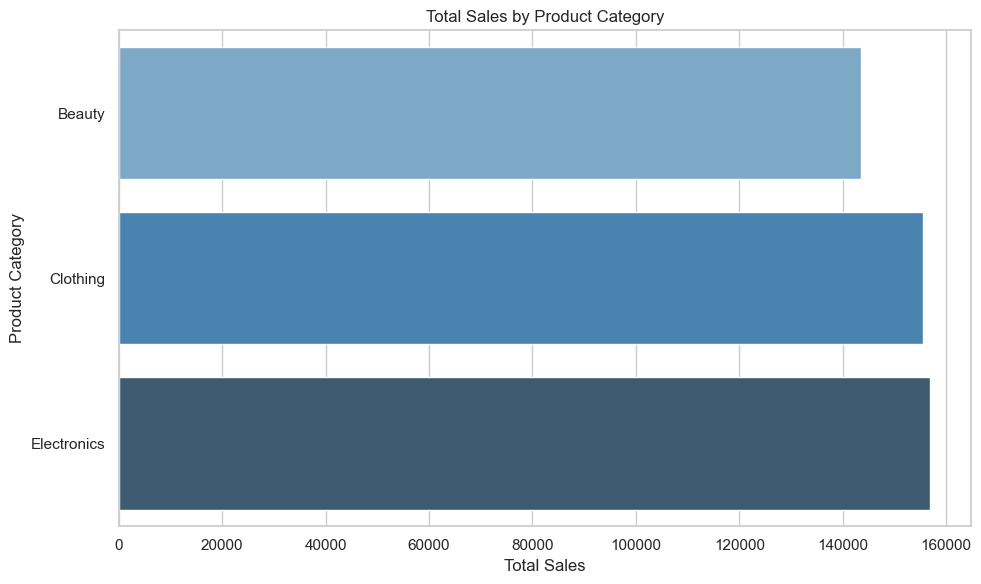

In [20]:
category_sales = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="Blues_d")
plt.title("Total Sales by Product Category")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.tight_layout()

plt.savefig(os.path.join(fig_dir, "01_sales_by_category.png"))
plt.show()


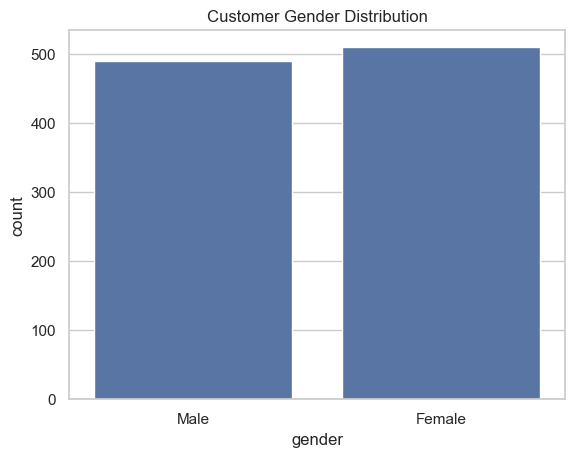

In [17]:
#  Gender Distribution
sns.countplot(data=df, x='gender')
plt.title('Customer Gender Distribution')

plt.savefig(os.path.join(fig_dir, "01_Customer_Gender_Distribution.png"))
plt.show()


C:\Users\choma\AppData\Local\Temp\ipykernel_24296\353693547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_sales.index, y=gender_sales.values, palette="Set2")


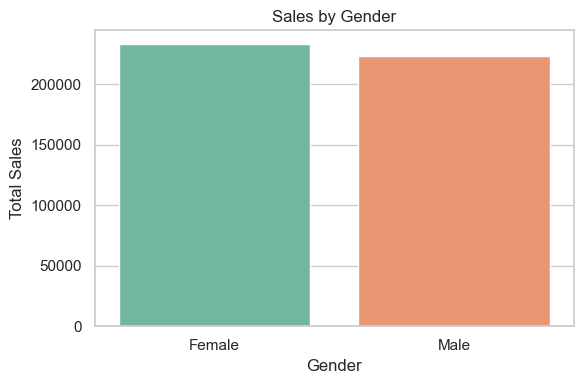

In [19]:
gender_sales = df.groupby('gender')['total_amount'].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette="Set2")
plt.title("Sales by Gender")
plt.ylabel("Total Sales")
plt.xlabel("Gender")
plt.tight_layout()

plt.savefig(os.path.join(fig_dir, "01_sales_by_gender.png"))
plt.show()


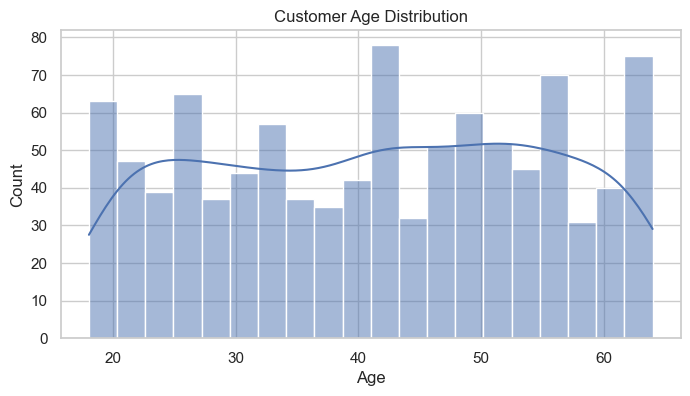

In [18]:
#  Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')

plt.savefig(os.path.join(fig_dir, "01_Customer_Age_Distribution.png"))
plt.show()


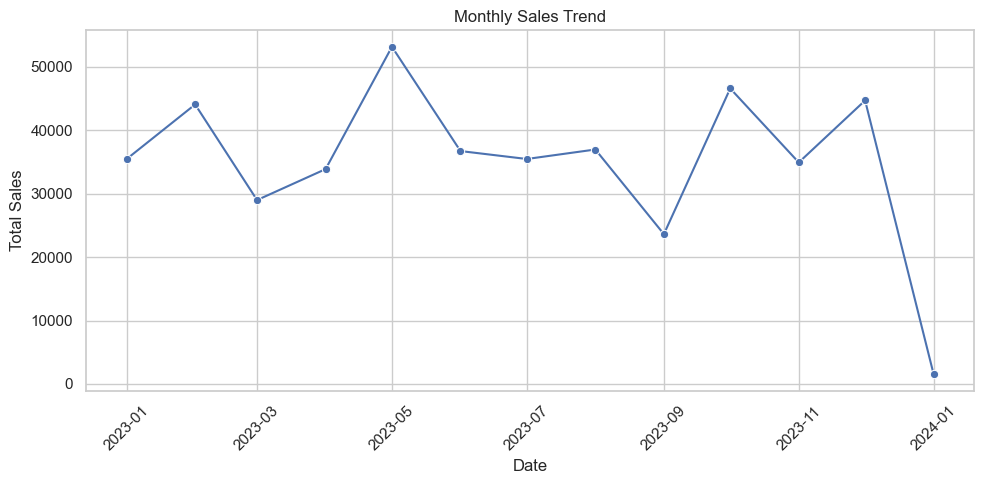

In [14]:
# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

monthly_sales = df.groupby(df['date'].dt.to_period('M'))['total_amount'].sum().reset_index()
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='date', y='total_amount', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()

# Save figure
plt.savefig(os.path.join(fig_dir, "01_monthly_sales_trend.png"))
plt.show()
